In [16]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sns

In [3]:
msft = yf.Ticker("MSFT")
df = msft.history()

In [4]:
df.to_csv('msft-test.csv')

In [2]:
df = pd.read_csv('msft-test.csv')



In [10]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-12-13 00:00:00-05:00,376.019989,377.640015,370.769989,374.369995,30955500,0.0,0.0
1,2023-12-14 00:00:00-05:00,373.309998,373.760010,364.130005,365.929993,43277500,0.0,0.0
2,2023-12-15 00:00:00-05:00,366.850006,372.399994,366.279999,370.730011,78478200,0.0,0.0
3,2023-12-18 00:00:00-05:00,369.450012,373.000000,368.679993,372.649994,21802900,0.0,0.0
4,2023-12-19 00:00:00-05:00,371.489990,373.260010,369.839996,373.260010,20603700,0.0,0.0
5,2023-12-20 00:00:00-05:00,375.000000,376.029999,370.529999,370.619995,26316700,0.0,0.0
6,2023-12-21 00:00:00-05:00,372.559998,374.410004,370.040009,373.540009,17708000,0.0,0.0
7,2023-12-22 00:00:00-05:00,373.679993,375.179993,372.709991,374.579987,17091100,0.0,0.0
8,2023-12-26 00:00:00-05:00,375.000000,376.940002,373.500000,374.660004,12673100,0.0,0.0
9,2023-12-27 00:00:00-05:00,373.690002,375.059998,372.809998,374.070007,14905400,0.0,0.0


AttributeError: 'function' object has no attribute 'set_title'

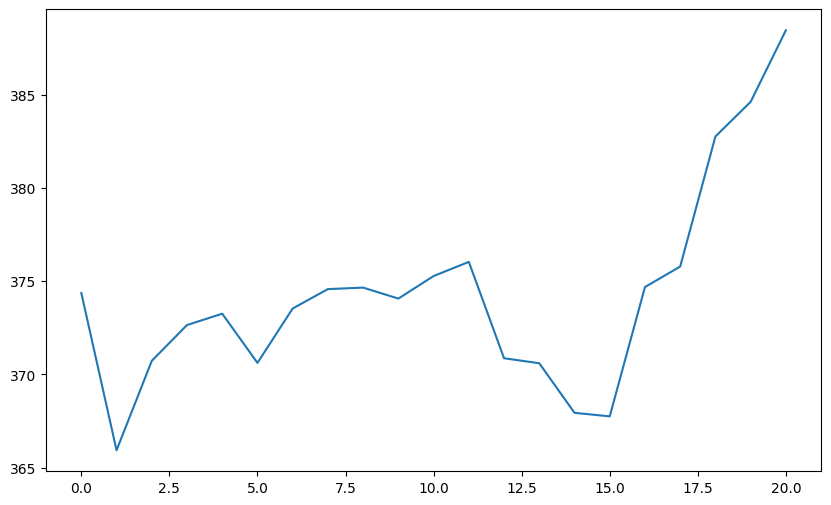

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df.Close)
plt.plot.set_title('Manual DateFormatter', loc='left', y=0.85, x=0.02,
             fontsize='medium')



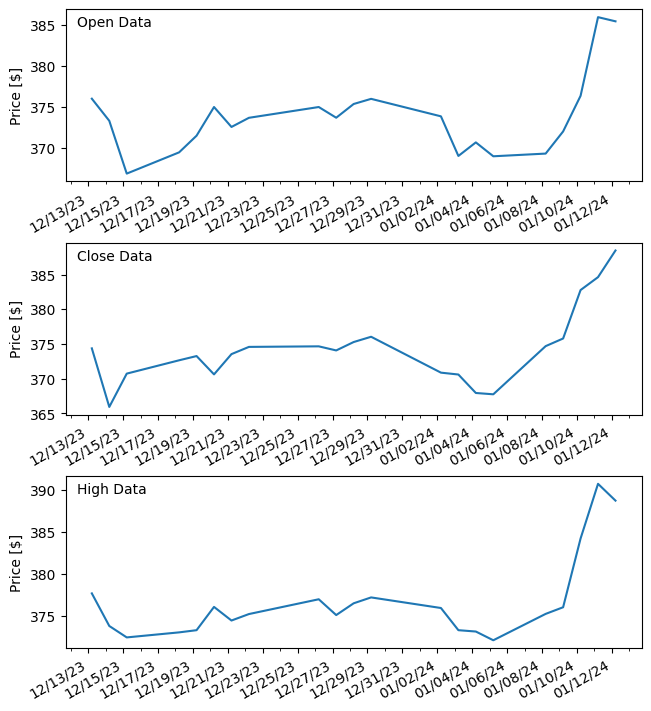

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Assuming df is your DataFrame with a 'Date' column
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

_list = ["Open", "Close", "High"]

fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), constrained_layout=True)

for i, ax in enumerate(axs):
    ax.plot(df['Date'], df[_list[i]])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.grid(False)
    ax.set_ylabel(r'Price [\$]')
    ax.set_title(f'{_list[i]} Data', loc='left', y=0.85, x=0.02, fontsize='medium')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')

plt.show()


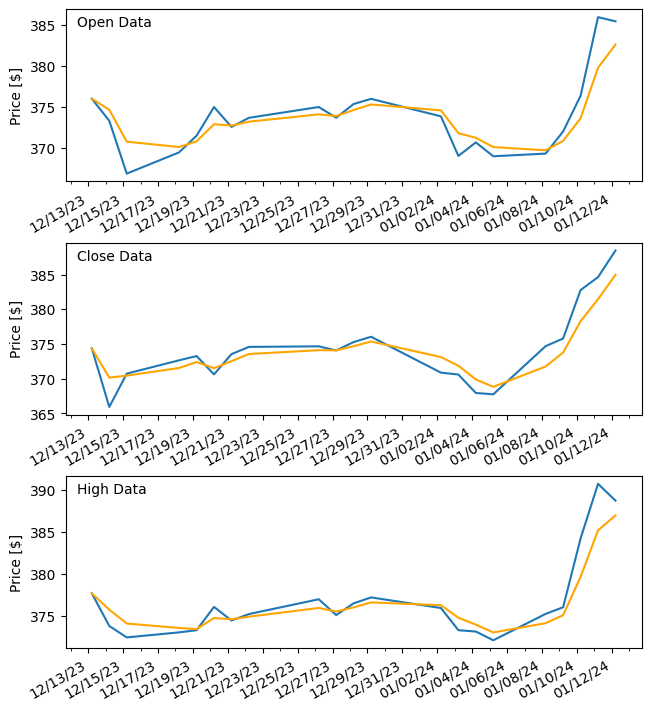

In [70]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')

# Set the smoothing parameter (0 < alpha < 1)

alpha = 0.5  # You can adjust this value
_i = 0
_list = ["Open","Close","High"]
for i in _list:
    df[_list[_i] + "SES"] = df[_list[_i]].ewm(alpha=alpha, adjust=False).mean()
    _i+=1

_i = 0
for ax in axs:
    ax.plot(df.Date, df[_list[_i]])
    ax.plot(df.Date, df[_list[_i]+"SES"], label=f'Simple Exponential Smoothing (alpha={alpha})', color='orange')

    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.grid(False)
    ax.set_ylabel(r'Price [\$]')
    ax.set_title(f'{_list[_i]} Data', loc='left', y=0.85, x=0.02,
             fontsize='medium')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    _i+=1

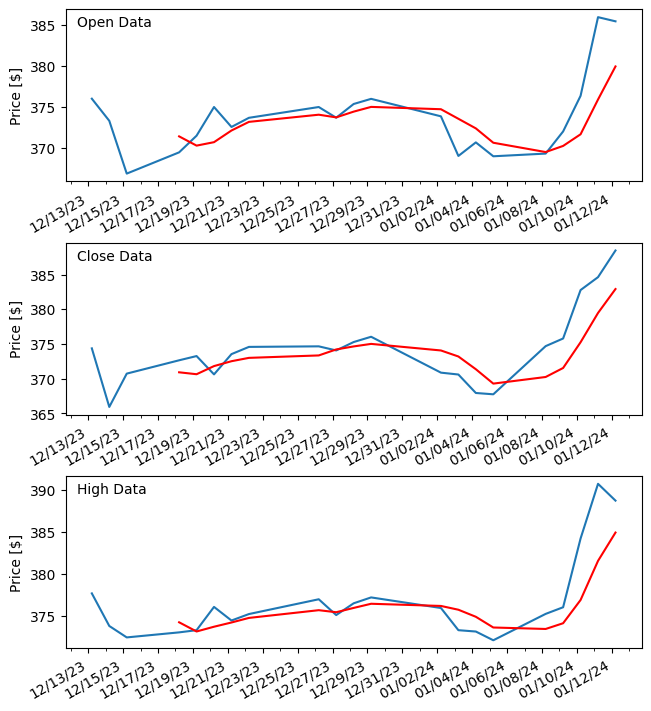

In [71]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')


window_size = 4  # You can adjust this value
_i = 0
_list = ["Open","Close","High"]
for i in _list:
    df[_list[_i] + "SMA"] = df[_list[_i]].rolling(window=window_size).mean()
    _i+=1

_i = 0
for ax in axs:
    ax.plot(df.Date, df[_list[_i]])
    ax.plot(df.Date, df[_list[_i]+"SMA"], label=f'Moving Average (window={window_size})', color='red')
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.grid(False)
    ax.set_ylabel(r'Price [\$]')
    ax.set_title(f'{_list[_i]} Data', loc='left', y=0.85, x=0.02,
             fontsize='medium')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    _i+=1

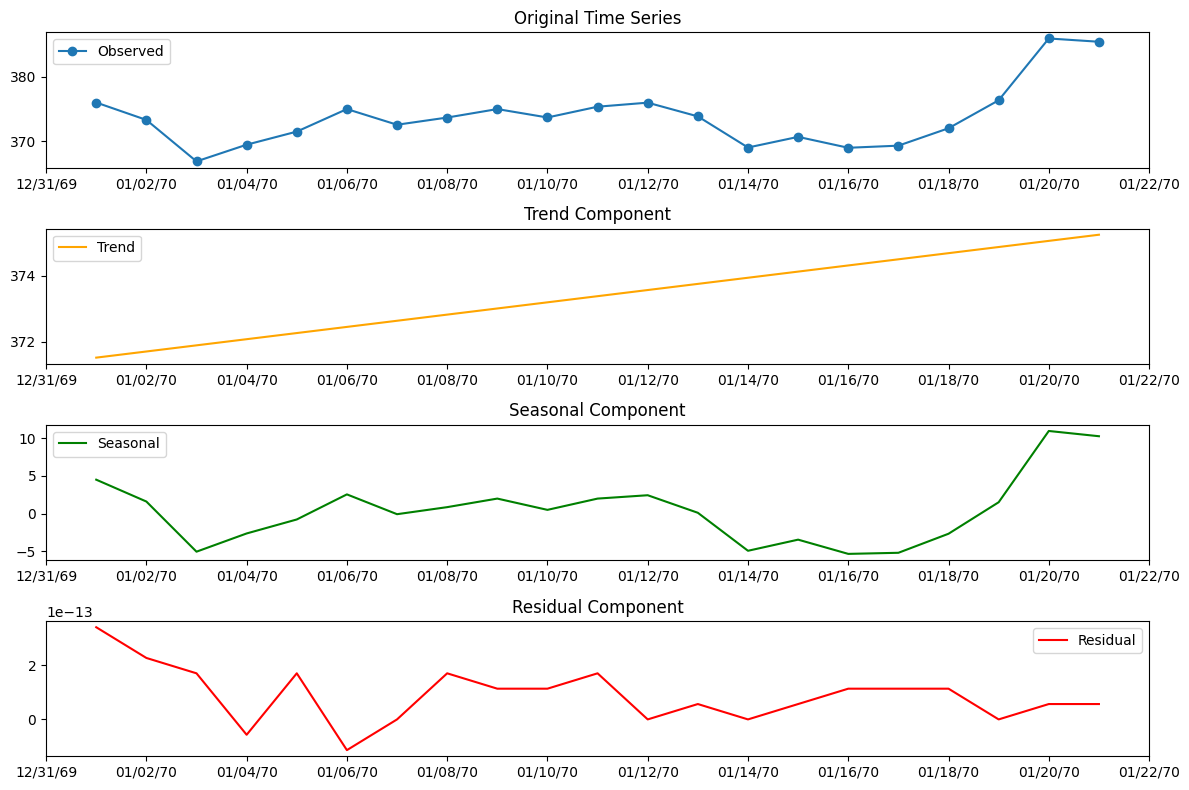

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset (assuming 'df' is your DataFrame with time index)
# df = pd.read_csv('your_dataset.csv', parse_dates=True, index_col='Date')

# Seasonal-Trend decomposition using LOESS (STL)
stl = sm.tsa.STL(df['Open'], period=13)  # Set the seasonal period (e.g., 13 for monthly data)
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the components
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.Date, df['Open'], label='Observed', marker='o')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(df.Date, trend, label='Trend', color='orange')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df.Date, seasonal, label='Seasonal', color='green')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df.Date, residual, label='Residual', color='red')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()